INISIALISASI

In [1]:
#Impor Library
import cv2
import numpy as np
import matplotlib.pyplot as plt

#Baca Gambar
img_path = 'nana.jpeg'
img = cv2.imread(img_path)

#mengubah format warna gambar dari BGR (Blue, Green, Red) ke RGB (Red, Green, Blue)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#konversi gambar dari ruang warna BGR ke HSV
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

#RENTANG NILAI HSV MASINNG - MASING WARNA

# - HIJAU -
lower_green = np.array([20, 10, 10])
upper_green = np.array([30, 175, 175])
lower_green_dark = np.array([60, 50, 50])
upper_green_dark = np.array([80, 255, 255])

# - BIRU -
lower_blue = np.array([20, 10, 10])
upper_blue = np.array([124, 175, 175])
lower_blue_dark = np.array([100, 50, 50])
upper_blue_dark = np.array([140, 255, 255])

# - MERAH -
lower_red = np.array([0, 5, 5])
upper_red = np.array([5, 175, 175])
lower_red_dark = np.array([0, 50, 50])
upper_red_dark = np.array([10, 255, 255])
lower_red_alt_dark = np.array([170, 50, 50])
upper_red_alt_dark = np.array([180, 255, 255])

BARIS CODE DETEKSI WARNA

In [2]:
mask_blue = cv2.inRange(hsv_img, lower_blue, upper_blue) + cv2.inRange(hsv_img, lower_red_dark, upper_red_dark) + cv2.inRange(hsv_img, lower_red_alt_dark, upper_red_alt_dark) + cv2.inRange(hsv_img, lower_green_dark, upper_green_dark)
mask_red = cv2.inRange(hsv_img, lower_green_dark, upper_green_dark) +  cv2.inRange(hsv_img, lower_blue, upper_blue) + cv2.inRange(hsv_img, lower_blue_dark, upper_blue_dark) + cv2.inRange(hsv_img, lower_red, upper_red)
mask_green = cv2.inRange(hsv_img, lower_blue_dark, upper_blue_dark) + cv2.inRange(hsv_img, lower_blue_dark, upper_blue_dark) + cv2.inRange(hsv_img, lower_red_dark, upper_red_dark) + cv2.inRange(hsv_img, lower_red_alt_dark, upper_red_alt_dark)+ cv2.inRange(hsv_img, lower_green_dark, upper_green_dark)

mask_blue_inv = cv2.bitwise_not(mask_blue)
mask_red_inv = cv2.bitwise_not(mask_red)
mask_green_inv = cv2.bitwise_not(mask_green)

OUTPUT GAMBAR

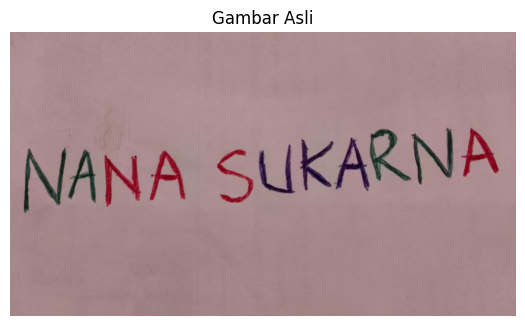

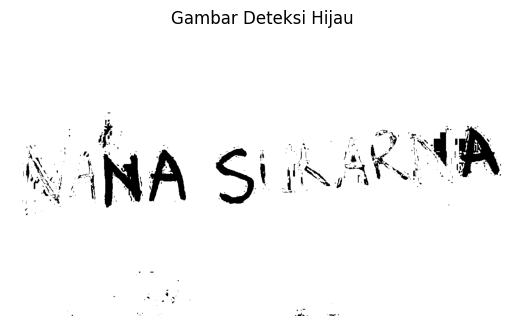

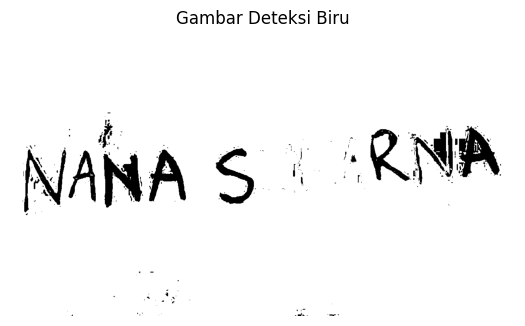

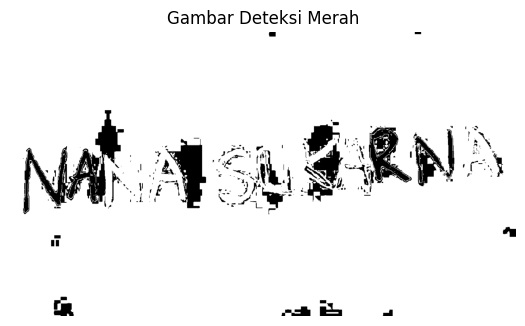

In [3]:
plt.figure(figsize=(30, 8))
plt.subplot(1, 4, 1)
plt.imshow(img_rgb)
plt.title('Gambar Asli')
plt.axis('off')
plt.show()

plt.figure(figsize=(30, 8))
plt.subplot(1, 4, 4)
plt.imshow(mask_green_inv, cmap='gray')
plt.title('Gambar Deteksi Hijau')
plt.axis('off')
plt.show()

plt.figure(figsize=(30, 8))
plt.subplot(1, 4, 2)
plt.imshow(mask_blue_inv, cmap='gray')
plt.title('Gambar Deteksi Biru')
plt.axis('off')
plt.show()

plt.figure(figsize=(30, 8))
plt.subplot(1, 4, 3)
plt.imshow(mask_red_inv, cmap='gray')
plt.title('Gambar Deteksi Merah')
plt.axis('off')
plt.show()

CODE AMBANG BATAS

In [4]:
#Rentang None
# None
lower_none = np.array([0, 0,0])
upper_none = np.array([0, 0,0])

mask_none = cv2.inRange(img_rgb, lower_none, upper_none)
mask_blue2 = cv2.inRange(hsv_img, lower_blue_dark, upper_blue_dark)
mask_red_blue = cv2.inRange(hsv_img, lower_blue_dark, upper_blue_dark) + cv2.inRange(hsv_img, lower_blue_dark, upper_blue_dark) + cv2.inRange(hsv_img, lower_red_dark, upper_red_dark) + cv2.inRange(hsv_img, lower_red_alt_dark, upper_red_alt_dark)
mask_red_green_blue = cv2.inRange(hsv_img, lower_blue_dark, upper_blue_dark) + cv2.inRange(hsv_img, lower_blue_dark, upper_blue_dark) + cv2.inRange(hsv_img, lower_red_dark, upper_red_dark) + cv2.inRange(hsv_img, lower_red_alt_dark, upper_red_alt_dark) + cv2.inRange(hsv_img, lower_green_dark, upper_green_dark) +cv2.inRange(hsv_img, lower_blue, upper_blue)

OUTPU GAMBAR AMBANG BATAS

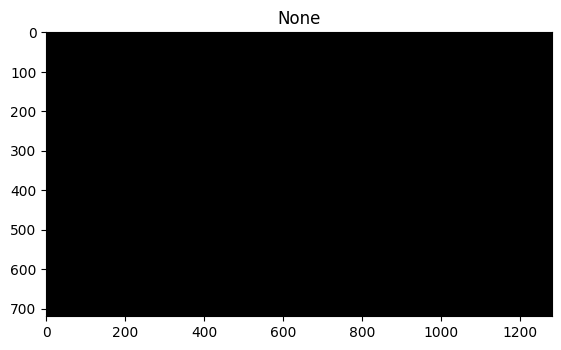

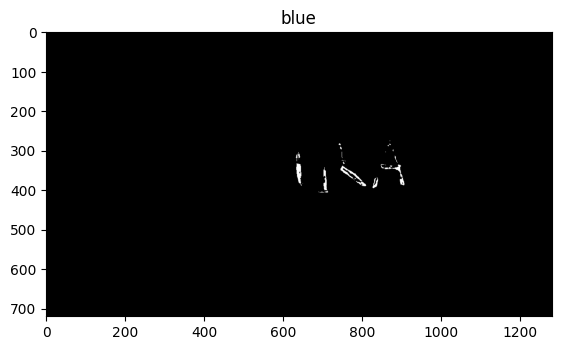

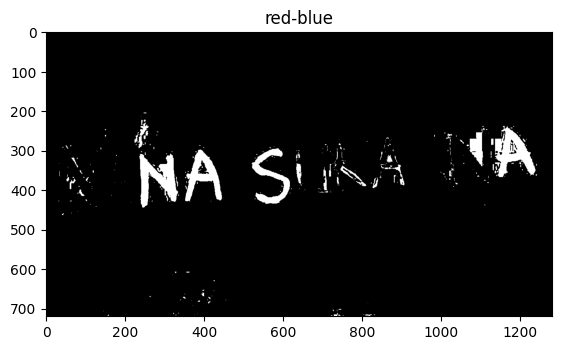

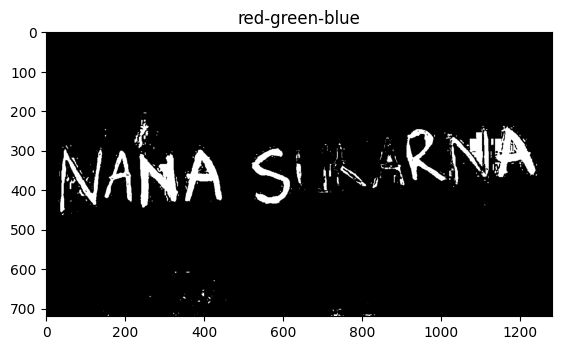

In [5]:
plt.figure(figsize=(30, 8))
plt.subplot(1, 4, 1)
plt.imshow(mask_none, cmap='gray')
plt.title('None')
plt.show()

plt.figure(figsize=(30, 8))
plt.subplot(1, 4, 1)
plt.imshow(mask_blue2, cmap='gray')
plt.title('blue')
plt.show()

plt.figure(figsize=(30, 8))
plt.subplot(1, 4, 1)
plt.imshow(mask_red_blue, cmap='gray')
plt.title('red-blue')
plt.show()

plt.figure(figsize=(30, 8))
plt.subplot(1, 4, 1)
plt.imshow(mask_red_green_blue, cmap='gray')
plt.title('red-green-blue')
plt.show()